In [130]:
from pyhard.measures import ClassificationMeasures #k_disagreeing_neighbors, class_likelihood_diff, disjunct_class_percentage
import numpy as np
import pandas as pd

In [131]:
file_names = ["mfeat-fac", "mfeat-fou", "mfeat-kar", "mfeat-mor", "mfeat-pix", "mfeat-zer"]
dataset_names = [x.replace("-","_") for x in file_names]

mfeat_fac = pd.read_csv("mfeat-fac.csv",delim_whitespace=True,header=None)
mfeat_fou = pd.read_csv("mfeat-fou.csv",delim_whitespace=True,header=None)
mfeat_kar = pd.read_csv("mfeat-kar.csv",delim_whitespace=True,header=None)
mfeat_mor = pd.read_csv("mfeat-mor.csv",delim_whitespace=True,header=None)
mfeat_pix = pd.read_csv("mfeat-pix.csv",delim_whitespace=True,header=None)
mfeat_zer = pd.read_csv("mfeat-zer.csv",delim_whitespace=True,header=None)

In [132]:
# É essencial que todo rótulo de atributos seja uma string, haverão erros de acesso por chave (Key Error) caso contrário

for dataset in [mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer]:
    dataset.columns = [str(item) for item in dataset.columns]

In [133]:
mfeat_fac.shape, mfeat_fou.shape, mfeat_kar.shape, mfeat_mor.shape, mfeat_pix.shape, mfeat_zer.shape

((2000, 216), (2000, 76), (2000, 64), (2000, 6), (2000, 240), (2000, 47))

In [134]:
y_data = []
for _ in range(10): # Para cada uma das classes
    for item in range(200): # Para cada uma das instâncias
        y_data.append(str(_))

len(y_data)

2000

In [135]:
y_data = pd.DataFrame(y_data, columns = ["tgt"])
y_data.value_counts()

tgt
0      200
1      200
2      200
3      200
4      200
5      200
6      200
7      200
8      200
9      200
Name: count, dtype: int64

In [136]:
mfeat_fac = pd.concat([mfeat_fac, y_data],axis = 1)
mfeat_fou = pd.concat([mfeat_fou, y_data],axis = 1)
mfeat_kar = pd.concat([mfeat_kar, y_data],axis = 1)
mfeat_mor = pd.concat([mfeat_mor, y_data],axis = 1)
mfeat_pix = pd.concat([mfeat_pix, y_data],axis = 1)
mfeat_zer = pd.concat([mfeat_zer, y_data],axis = 1)


for dataset in [mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer]:
    print(dataset.head())

     0    1    2    3    4    5   6  7  8  9  ...  207  208  209  210  211  \
0   98  236  531  673  607  647   2  9  3  6  ...  536  628  632   18   36   
1  121  193  607  611  585  665   7  9  2  4  ...  458  570  634   15   32   
2  115  141  590  605  557  627  12  6  3  3  ...  498  572  656   20   35   
3   90  122  627  692  607  642   0  6  4  5  ...  549  628  621   16   35   
4  157  167  681  666  587  666   8  6  1  4  ...  525  568  653   16   35   

   212  213  214  215  tgt  
0    8   15   12   13    0  
1   11   13   15   11    0  
2   16   14   13    6    0  
3    7   12   15    9    0  
4   10   15   13   13    0  

[5 rows x 217 columns]
          0         1         2         3         4         5         6  \
0  0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1  0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2  0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3  0.062336  0.217979  0.080243  

In [137]:
mfeat_fac.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,tgt
0,98,236,531,673,607,647,2,9,3,6,...,536,628,632,18,36,8,15,12,13,0
1,121,193,607,611,585,665,7,9,2,4,...,458,570,634,15,32,11,13,15,11,0
2,115,141,590,605,557,627,12,6,3,3,...,498,572,656,20,35,16,14,13,6,0
3,90,122,627,692,607,642,0,6,4,5,...,549,628,621,16,35,7,12,15,9,0
4,157,167,681,666,587,666,8,6,1,4,...,525,568,653,16,35,10,15,13,13,0


In [138]:
M = ClassificationMeasures(mfeat_fac)

In [139]:
df_meta_feat = M.calculate_all() 

In [140]:
columns = ['feature_kDN', 'feature_CLD', 'feature_DCP']
reduced_meta_features = df_meta_feat[['feature_kDN', 'feature_CLD', 'feature_DCP']]

for column in columns:
    std = np.std(reduced_meta_features[column])
    mean = np.mean(reduced_meta_features[column])
    print(mean, std)

0.065 0.170923959701383
0.10597606745846272 0.2242805110960145
0.03573435075672626 0.13852476846316447


In [141]:
reduced_meta_features.describe()

,feature_kDN,feature_CLD,feature_DCP
count,2000.000000,2000.000000,2000.000000
mean,0.065000,0.105976,0.035734
std,0.170967,0.224337,0.138559
min,0.000000,0.043161,0.000000
25%,0.000000,0.044152,0.000000
50%,0.000000,0.045434,0.006289
75%,0.000000,0.047734,0.011299
max,1.000000,0.960679,0.994350


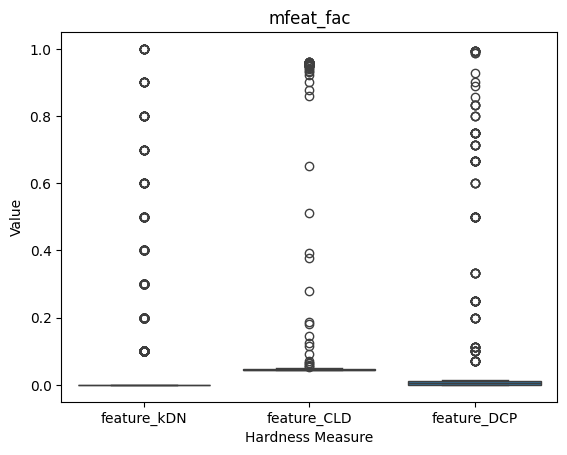

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x="variable", y="value", data=pd.melt(reduced_meta_features))
plt.title("mfeat_fac")
plt.xlabel("Hardness Measure")
plt.ylabel("Value")

plt.show()

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.065000     0.105976     0.069146
std       0.170967     0.224337     0.193783
min       0.000000     0.043161     0.000000
25%       0.000000     0.044152     0.005780
50%       0.000000     0.045434     0.011299
75%       0.000000     0.047734     0.025806
max       1.000000     0.960679     0.994350


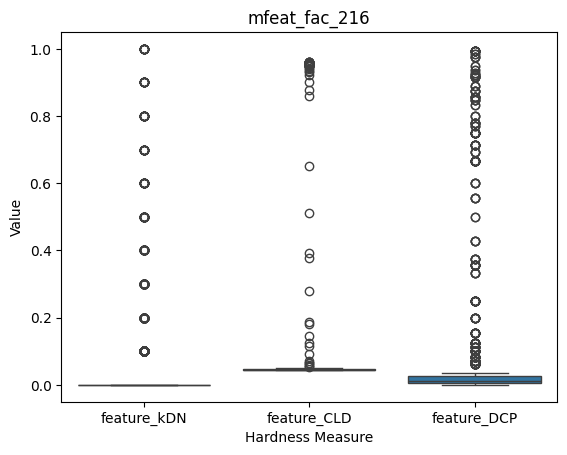

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.255050     0.280207     0.258844
std       0.283822     0.269948     0.301775
min       0.000000     0.116178     0.000000
25%       0.000000     0.124030     0.043478
50%       0.100000     0.134347     0.141361
75%       0.500000     0.254440     0.350000
max       1.000000     0.897633     0.994624


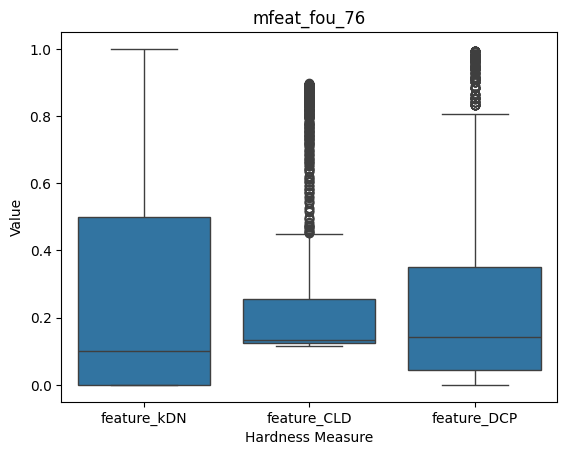

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.088300     0.083769     0.116615
std       0.187912     0.201080     0.241498
min       0.000000     0.030164     0.000000
25%       0.000000     0.033023     0.012422
50%       0.000000     0.035003     0.026144
75%       0.100000     0.036044     0.053571
max       1.000000     0.968568     0.994444


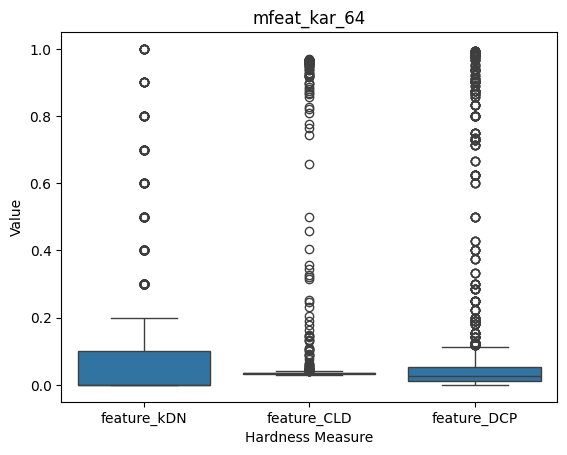

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.324350     0.350592     0.312993
std       0.307017     0.280292     0.294446
min       0.000000     0.100630     0.000000
25%       0.000000     0.115100     0.057692
50%       0.300000     0.168738     0.200000
75%       0.600000     0.625121     0.511335
max       1.000000     0.916245     0.997481


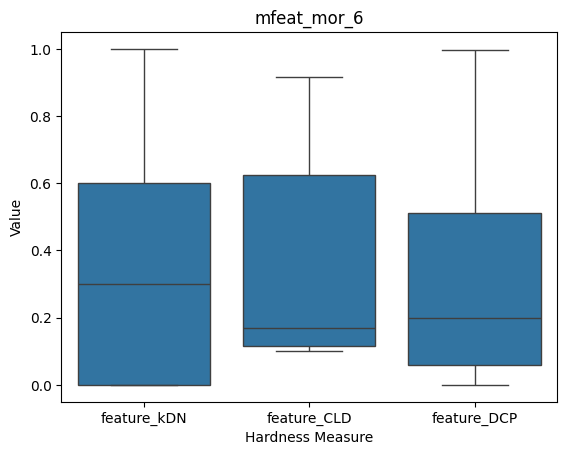

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.047650     0.101876     0.047378
std       0.148072     0.209521     0.154788
min       0.000000     0.047257     0.000000
25%       0.000000     0.047805     0.000000
50%       0.000000     0.049925     0.010811
75%       0.000000     0.052263     0.012987
max       1.000000     0.956344     0.994595


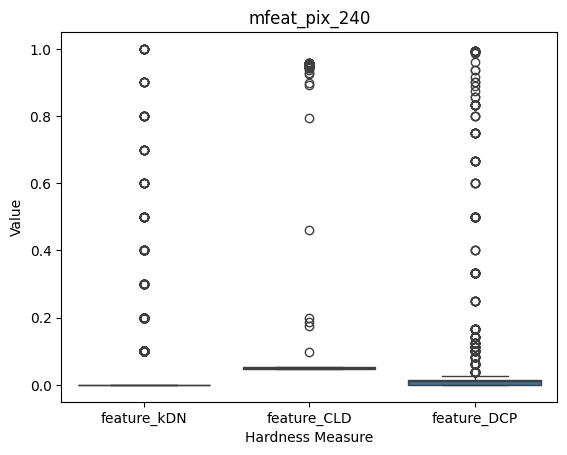

       feature_kDN  feature_CLD  feature_DCP
count  2000.000000  2000.000000  2000.000000
mean      0.243650     0.304585     0.283024
std       0.281761     0.272384     0.314147
min       0.000000     0.120024     0.000000
25%       0.000000     0.129656     0.040936
50%       0.100000     0.137127     0.080537
75%       0.500000     0.464579     0.533762
max       1.000000     0.893490     0.996785


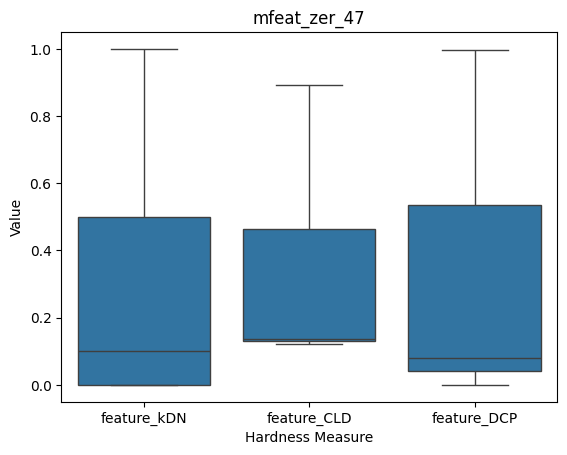

In [146]:
file_names = ["mfeat-fac", "mfeat-fou", "mfeat-kar", "mfeat-mor", "mfeat-pix", "mfeat-zer"]
views = [mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer]
measure_columns = ['feature_kDN', 'feature_CLD', 'feature_DCP']

results_mean = {}
results_std = {}

for view, name in zip(views, dataset_names):
    name = name + "_" + str(view.shape[1]-1)
    M = ClassificationMeasures(view)
    df_meta_feat = M.calculate_all()
    reduced_meta_features = df_meta_feat[measure_columns]
    print(reduced_meta_features.describe())
    sns.boxplot(x="variable", y="value", data=pd.melt(reduced_meta_features))

    results_mean[name] = [np.mean(reduced_meta_features[_]) for _ in measure_columns]
    results_std[name] = [np.std(reduced_meta_features[_]) for _ in measure_columns]
   
    plt.title(name)
    plt.xlabel("Hardness Measure")
    plt.ylabel("Value")
    plt.show()

In [147]:
results_mean

{'mfeat_fac_216': [0.065, 0.10597606745846272, 0.06914614483178173],
 'mfeat_fou_76': [0.25505, 0.2802065344285318, 0.25884427479913125],
 'mfeat_kar_64': [0.0883, 0.08376903342343837, 0.11661524210477209],
 'mfeat_mor_6': [0.32435, 0.3505923419499977, 0.31299330022453836],
 'mfeat_pix_240': [0.04764999999999999,
  0.10187625093526316,
  0.047377571514065846],
 'mfeat_zer_47': [0.24364999999999998,
  0.30458542939053157,
  0.2830238662976975]}

In [163]:
list(results_std.values())


[[0.170923959701383, 0.2242805110960145, 0.19373446289579968],
 [0.28375076651878844, 0.2698802911082614, 0.30169936764568284],
 [0.1878646055008766, 0.2010295166587355, 0.24143740318075144],
 [0.3069398597445434, 0.2802220985499212, 0.2943725546560211],
 [0.14803539272755015, 0.20946825562086935, 0.15474942828169672],
 [0.28169074798438093, 0.272315641739835, 0.3140682398220911]]

Text(0.5, 1.0, 'Metrics Mean')

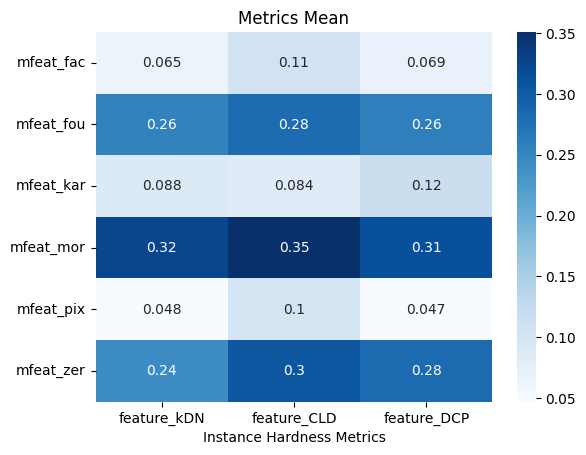

In [161]:
sns.heatmap(list(results_mean.values()), annot = True, cmap = 'Blues', xticklabels = measure_columns, yticklabels = dataset_names)
plt.xlabel("Instance Hardness Metrics")
plt.title("Metrics Mean")

Text(0.5, 1.0, 'Metrics Standard Deviation')

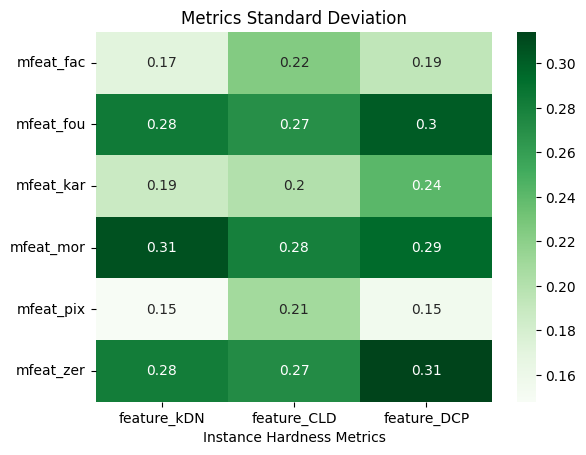

In [164]:
sns.heatmap(list(results_std.values()), annot = True, cmap = 'Greens', xticklabels = measure_columns, yticklabels = dataset_names)
plt.xlabel("Instance Hardness Metrics")
plt.title("Metrics Standard Deviation")